In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Data preprocessing

In [2]:
datasetname = "JSB_Chorales"
datapath = "../data/"+datasetname+'/'

In [3]:
from utils.midiparser import getDictionaries, parseFolder, cleanDic
from utils.preprocessing import toZ
datasetname = "JSB_Chorales"
datapath = "../data/"+datasetname+'/'
dictionaries = getDictionaries() 
dataset = parseFolder(datapath, dictionaries)
dictionaries = cleanDic(dataset, dictionaries)
xdTs, xTs, xPs, dTvocsize, Tvocsize, pitchvocsize = toZ(dataset, dictionaries)

Processing 1
Processing 10
Processing 100
Processing 101
Processing 102
Processing 103
Processing 104
Processing 105
Processing 106
Processing 107
Processing 108
Processing 109
Processing 11
Processing 110
Processing 111
Processing 112
Processing 113
Processing 114
Processing 115
Processing 116
Processing 117
Processing 118
Processing 119
Processing 12
Processing 120
Processing 122
Processing 123
Processing 124
Processing 125
Processing 126
Processing 127
Processing 128
Processing 129
Processing 13
Processing 130
Processing 131
Processing 132
Processing 134
Processing 135
Processing 136
Processing 137
Processing 138
Processing 139
Processing 14
Processing 140
Processing 141
Processing 142
Processing 143
Processing 144
Processing 145
Processing 146
Processing 147
Processing 148
Processing 149
Processing 15
Processing 150
Processing 151
Processing 152
Processing 153
Processing 154
Processing 155
Processing 156
Processing 157
Processing 158
Processing 159
Processing 16
Processing 160
Proc

# Write MIDI

In [6]:
from utils.preprocessing import toMIDI
dtseq, Tseq, pitchseq = toMIDI(xdTs[0], xTs[0], xPs[0], dictionaries)

from utils.midiparser import writeMIDI
for dt,t,p in zip(dtseq, Tseq, pitchseq):
    print(dictionaries['duration_text'][dictionaries['dtseqs'].index(dt)], dictionaries['duration_text'][dictionaries['Tseqs'].index(t)], dictionaries['pitch_text'][dictionaries['pitchseqs'].index(p)])
midi = writeMIDI(dtseq, Tseq, pitchseq, path='../data/', label='example')

('0', '4', 'C5')
('0', '.25)3', 'G6')
('0', '2', 'C7')
('0', '2', 'E7')
('4', '4', 'C6')
('4', '4', 'B5')
('0', '4', 'D7')
('0', '4', 'G7')
('4', '4', 'C6')
('0', '2', 'C7')
('0', '4', 'E7')
('4', '4', 'A5')
('4', '4', 'bB5')
('0', '4', 'F6')
('0', '4', 'bB6')
('0', '4', 'D7')
('4', '2.', 'C6')
('0', '4', 'G6')
('0', '4', 'E7')
('4', '4', 'F5')
('0', '4', 'A6')
('0', '4', 'F7')
('4', '4', 'C5')
('0', '2', 'G6')
('0', '4', 'E7')
('4', '4', 'G5')
('0', '4', 'B5')
('0', '4', 'D7')
('4', '4', 'A5')
('0', '4', 'C6')
('0', '4', 'E6')
('0', '2.', 'C7')
('4', '4', 'F5')
('0', '2', 'F6')
('0', '2', 'A6')
('4', '4', 'A5')
('4', '2.', 'C6')
('0', '4', 'E6')
('0', '1', 'G6')
('0', '2', 'E7')
('4', '4', 'E5')
('4', '.25)3', 'G5')
('0', '2', 'D7')
('4', '4', 'B5')
('4', '1', 'C5')
('0', '2.', 'E6')
('0', '1', 'C7')
('2.', '2', 'G6')
('0', '4', 'E7')
('4', '4', 'G5')
('0', '2', 'B6')
('0', '4', 'D7')
('4', '4', 'G#5')
('0', '2', 'E6')
('0', '4', 'E7')
('4', '4', 'A5')
('0', '2', 'A6')
('0', '4', 'C7'

# Cross-validation

In [4]:
from utils.evaluation import split
k_folds = 10
splitted = split(dataset,k_folds)

In [7]:
from models.ngram import Ngram, flatten_data
models = {'ngram0': [], 'ngram1': []}
losses = {'ngram0': [], 'ngram1': []}
train_losses = {'ngram0': [], 'ngram1': []}
for i in xrange(k_folds):
    model = Ngram(0)
    train_data = flatten_data(splitted[i]['train'])
    test_data = flatten_data(splitted[i]['test'])
    alphabet = list(set(train_data))
    train_loss = model.train(train_data, alphabet)
    train_losses['ngram0'].append(train_loss)
    print train_loss
    loss = model.avg_loglikelihood_uniform(test_data)
    losses['ngram0'].append(loss)
    print loss
    models['ngram0'].append(model)

-13.014555424759681
-13.014555424771364
-13.052989719132627
-13.052989719143858
-13.017538273939955
-13.017538273940566
-12.978409862629903
-12.978409862651443
-13.00857634704844
-13.008576347071369
-13.002579341089984
-13.00257934107872
-13.008576347048553
-13.008576347072077
-12.960089123829356
-12.96008912385175
-13.017538273939953
-13.01753827394071
-13.017538273939955
-13.017538273940621


In [8]:
for i in xrange(k_folds):
    model = Ngram(1)
    train_data = flatten_data(splitted[i]['train'])
    test_data = flatten_data(splitted[i]['test'])
    alphabet = list(set(train_data))
    train_loss = model.train(train_data, alphabet)
    train_losses['ngram1'].append(train_loss)
    print train_loss
    loss = model.avg_loglikelihood_uniform(test_data)
    losses['ngram1'].append(loss)
    print loss
    models['ngram1'].append(model)

-6.50727771238314
-6.507277712385379
-6.52649485956642
-6.526494859571591
-6.508769136970024
-6.508769136970635
-6.48920493132418
-6.48920493132497
-6.5042881735349525
-6.504288173536053
-6.501289670534869
-6.501289670540857
-6.504288173535067
-6.504288173536015
-6.480044561925431
-6.480044561925979
-6.508769136970021
-6.508769136970779
-6.508769136970023
-6.508769136970689


[0.01176945380677188, 0.023538907613514477]


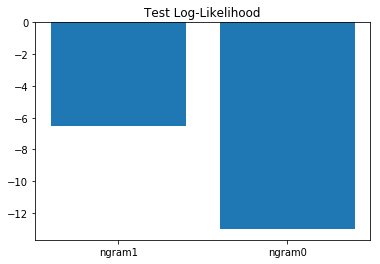

In [9]:
from utils.evaluation import plot_metric
plot_metric(losses, "Test Log-Likelihood")